In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier

In [68]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
%cd /content/drive/MyDrive/DSL

/content/drive/MyDrive/DSL


In [70]:
pd.set_option('display.max_columns',None)

In [71]:
df=pd.read_csv('/content/drive/MyDrive/DSL/Assingment3/Loan Train.csv')

In [72]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [74]:
df['Self_Employed'].fillna(6)

,Self_Employed
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
609,0.0
610,0.0
611,0.0
612,0.0


In [75]:
df['Self_Employed']=df['Self_Employed'].fillna(6)

In [76]:
df['Self_Employed'].isnull().sum()

0

In [77]:
columns = ['Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term','Loan_Status']


In [78]:
for col in columns:
  print(col,'___',df[col].unique())

Dependents ___ ['0' '1' '2' '3+' nan]
Education ___ ['Graduate' 'Not Graduate']
Self_Employed ___ [0. 1. 6.]
Loan_Amount_Term ___ [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Loan_Status ___ ['Y' 'N']


In [79]:
for col in columns:
  print(df[col].value_counts())
  print('=======================')

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
0.0    500
1.0     82
6.0     32
Name: count, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [80]:
cols= df.columns.tolist()

In [81]:
cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [82]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [83]:
df.shape

(614, 13)

In [84]:
df[df.isnull().any(axis=1)]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,0.0,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,6.0,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,0.0,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,6.0,3717,2925.0,151.0,360.0,NaN,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,LP002925,NaN,No,0,Graduate,0.0,4750,0.0,94.0,360.0,1.0,Semiurban,Y
592,LP002933,NaN,No,3+,Graduate,1.0,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,0.0,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,6.0,416,41667.0,350.0,180.0,NaN,Urban,N


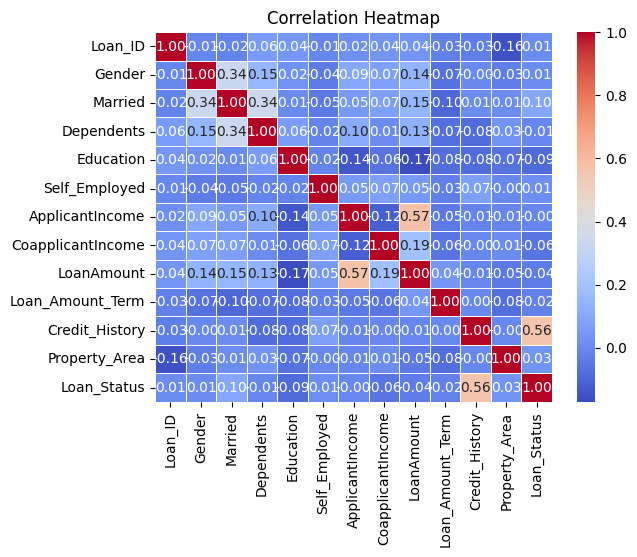

In [85]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for col in df.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))  # Convert categorical to numbers
    label_encoders[col] = le  # Store encoders for later use

# Compute correlation and plot heatmap
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [86]:

high_corr_pairs = df_encoded.corr()[(df_encoded.corr() > 0.5) & (df_encoded.corr() != 1)].stack()
print(high_corr_pairs)


ApplicantIncome  LoanAmount         0.570909
LoanAmount       ApplicantIncome    0.570909
Credit_History   Loan_Status        0.561678
Loan_Status      Credit_History     0.561678
dtype: float64


In [87]:
from sklearn.linear_model import LinearRegression
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
for col in df.columns:
    if df[col].isnull().any():  # Check if there are missing values in the column
        # Find the most correlated column
        correlated_cols = df_encoded.corr()[col][df_encoded.corr()[col] > 0.5].index.tolist()
        correlated_cols.remove(col)  # Remove the column itself

        if correlated_cols:

          correlated_col = correlated_cols[0]  # Take the most correlated column

          # Prepare training data (excluding rows where the target column is NaN)
          train_df = df.dropna(subset=[col])
          X_train = train_df[[correlated_col]]
          y_train = train_df[col]

          # Train a Linear Regression model
          model = LinearRegression()
          model.fit(X_train, y_train)

          # Predict missing values
          missing_rows = df[col].isnull()
          df.loc[missing_rows, col] = model.predict(df.loc[missing_rows, [correlated_col]])


In [88]:
for i in range(df.shape[0]):
  if df['Credit_History'][i]>0.5:
    df['Credit_History'][i]=1
  else:
    df['Credit_History'][i]=0

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Credit_History'][i]=1
<ipython-input-88-fbfbe1a1c23d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History'][i]=1
<ipython-input-88-fbfbe1a1c23d>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values i

In [89]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [90]:
df['Loan_Amount_Term'] = df.groupby('LoanAmount')['Loan_Amount_Term'].transform(lambda x: x.fillna(x.mean()))


In [91]:
mode_imp_cols=['Gender','Married','Dependents']
for col in mode_imp_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-91-fc42d6eab3e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [92]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [93]:
column_range = df['ApplicantIncome'].max() - df['ApplicantIncome'].min()
print(column_range)
print(df['ApplicantIncome'].max())
print(df['ApplicantIncome'].min())

80850
81000
150


In [94]:
counts = df.groupby('Loan_Status').size()
counts

,0
Loan_Status,
0,192
1,422


In [95]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,149.937265,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [96]:
import pandas as pd

# Define the custom bins
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 13000,
        16000, 20000, 50000, 80000]

# Define the labels for bins
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000',
          '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-13000', '13000-16000',
          '16000-20000', '20000-50000', '50000-80000']

df['IncomeBin'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels, right=False)

# Get the distribution of income bins
income_distribution = df['IncomeBin'].value_counts().sort_index()
df['SelfEmployedIncomeBin'] = pd.cut(df[df['Self_Employed'] == 1]['ApplicantIncome'],
                                     bins=bins, labels=labels, right=False)

self_employed_count = df[df['Self_Employed'] == 1].groupby('SelfEmployedIncomeBin')['Self_Employed'].count().sort_index()


<ipython-input-96-ac07e6233158>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  self_employed_count = df[df['Self_Employed'] == 1].groupby('SelfEmployedIncomeBin')['Self_Employed'].count().sort_index()


In [97]:
df.groupby(['IncomeBin','Self_Employed']).Self_Employed.count()

<ipython-input-97-ffdfae7df1fc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['IncomeBin','Self_Employed']).Self_Employed.count()


IncomeBin    Self_Employed
0-1000       0.0                2
             1.0                1
             6.0                2
1000-2000    0.0               31
             1.0                3
             6.0                1
2000-3000    0.0              113
             1.0               13
             6.0                8
3000-4000    0.0              140
             1.0                8
             6.0                9
4000-5000    0.0               78
             1.0                7
             6.0                2
5000-6000    0.0               38
             1.0               10
             6.0                5
6000-7000    0.0               30
             1.0                8
             6.0                2
7000-8000    0.0               10
             1.0                8
             6.0                1
8000-9000    0.0               13
             1.0                2
             6.0                0
9000-10000   0.0                9
             1.0                5
             6.0                0
10000-13000  0.0               14
             1.0                6
             6.0                1
13000-16000  0.0                9
             1.0                1
             6.0                0
16000-20000  0.0                4
             1.0                8
             6.0                0
20000-50000  0.0                7
             1.0                2
             6.0                0
50000-80000  0.0                1
             1.0                0
             6.0                1
Name: Self_Employed, dtype: int64

In [98]:
for i in range(df.shape[0]):
  if df['Self_Employed'][i]==6:
    df['Self_Employed'][i]=0


<ipython-input-98-4c5711ccfd3b>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Self_Employed'][i]=0
<ipython-input-98-4c5711ccfd3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [99]:
df.groupby(['IncomeBin','Self_Employed']).Self_Employed.count()

<ipython-input-99-ffdfae7df1fc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['IncomeBin','Self_Employed']).Self_Employed.count()


IncomeBin    Self_Employed
0-1000       0.0                4
             1.0                1
1000-2000    0.0               32
             1.0                3
2000-3000    0.0              121
             1.0               13
3000-4000    0.0              149
             1.0                8
4000-5000    0.0               80
             1.0                7
5000-6000    0.0               43
             1.0               10
6000-7000    0.0               32
             1.0                8
7000-8000    0.0               11
             1.0                8
8000-9000    0.0               13
             1.0                2
9000-10000   0.0                9
             1.0                5
10000-13000  0.0               15
             1.0                6
13000-16000  0.0                9
             1.0                1
16000-20000  0.0                4
             1.0                8
20000-50000  0.0                7
             1.0                2
50000-80000  0.0                2
             1.0                0
Name: Self_Employed, dtype: int64

In [100]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin,SelfEmployedIncomeBin
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,149.937265,360.0,1.0,Urban,1,5000-6000,NaN
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,4000-5000,NaN
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,3000-4000,3000-4000
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,2000-3000,NaN
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000-7000,NaN


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [102]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin,SelfEmployedIncomeBin
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,149.937265,360.000000,1.0,Urban,1,5000-6000,NaN
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.000000,360.000000,1.0,Rural,0,4000-5000,NaN
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.000000,360.000000,1.0,Urban,1,3000-4000,3000-4000
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.000000,360.000000,1.0,Urban,1,2000-3000,NaN
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.000000,360.000000,1.0,Urban,1,6000-7000,NaN
5,LP001011,Male,Yes,2,Graduate,1.0,5417,4196.0,267.000000,360.000000,1.0,Urban,1,5000-6000,5000-6000
6,LP001013,Male,Yes,0,Not Graduate,0.0,2333,1516.0,95.000000,360.000000,1.0,Urban,1,2000-3000,NaN
7,LP001014,Male,Yes,3+,Graduate,0.0,3036,2504.0,158.000000,360.000000,0.0,Semiurban,0,3000-4000,NaN
8,LP001018,Male,Yes,2,Graduate,0.0,4006,1526.0,168.000000,360.000000,1.0,Urban,1,4000-5000,NaN
9,LP001020,Male,Yes,1,Graduate,0.0,12841,10968.0,349.000000,360.000000,1.0,Semiurban,0,10000-13000,NaN


In [103]:
cat_col=['Married','Gender','Education','Property_Area','Dependents']

In [104]:
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [105]:
df_encoded.head()

,Loan_ID,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,IncomeBin,SelfEmployedIncomeBin,Married_Yes,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,0.0,5849,0.0,149.937265,360.0,1.0,1,5000-6000,NaN,False,True,False,False,True,False,False,False
1,LP001003,0.0,4583,1508.0,128.000000,360.0,1.0,0,4000-5000,NaN,True,True,False,False,False,True,False,False
2,LP001005,1.0,3000,0.0,66.000000,360.0,1.0,1,3000-4000,3000-4000,True,True,False,False,True,False,False,False
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,1,2000-3000,NaN,True,True,True,False,True,False,False,False
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,1,6000-7000,NaN,False,True,False,False,True,False,False,False


In [106]:
df_encoded.drop(columns=['Loan_ID','IncomeBin','SelfEmployedIncomeBin'],axis=1,inplace=True)

In [107]:
df_encoded.head(20)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_Yes,Gender_Male,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,0.0,5849,0.0,149.937265,360.000000,1.0,1,False,True,False,False,True,False,False,False
1,0.0,4583,1508.0,128.000000,360.000000,1.0,0,True,True,False,False,False,True,False,False
2,1.0,3000,0.0,66.000000,360.000000,1.0,1,True,True,False,False,True,False,False,False
3,0.0,2583,2358.0,120.000000,360.000000,1.0,1,True,True,True,False,True,False,False,False
4,0.0,6000,0.0,141.000000,360.000000,1.0,1,False,True,False,False,True,False,False,False
5,1.0,5417,4196.0,267.000000,360.000000,1.0,1,True,True,False,False,True,False,True,False
6,0.0,2333,1516.0,95.000000,360.000000,1.0,1,True,True,True,False,True,False,False,False
7,0.0,3036,2504.0,158.000000,360.000000,0.0,0,True,True,False,True,False,False,False,True
8,0.0,4006,1526.0,168.000000,360.000000,1.0,1,True,True,False,False,True,False,True,False
9,0.0,12841,10968.0,349.000000,360.000000,1.0,0,True,True,False,True,False,True,False,False


In [108]:
encoded_cols=df_encoded.columns.tolist()
print(encoded_cols)

['Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+']


In [109]:
X=df_encoded.drop('Loan_Status',axis=1)
y=df_encoded['Loan_Status']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y,shuffle=True,random_state=42)

In [111]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [112]:
export_graphviz(tree,out_file ='df_encoded',feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],class_names = ['Approved','Rejected'], rounded = True,filled = True ,)

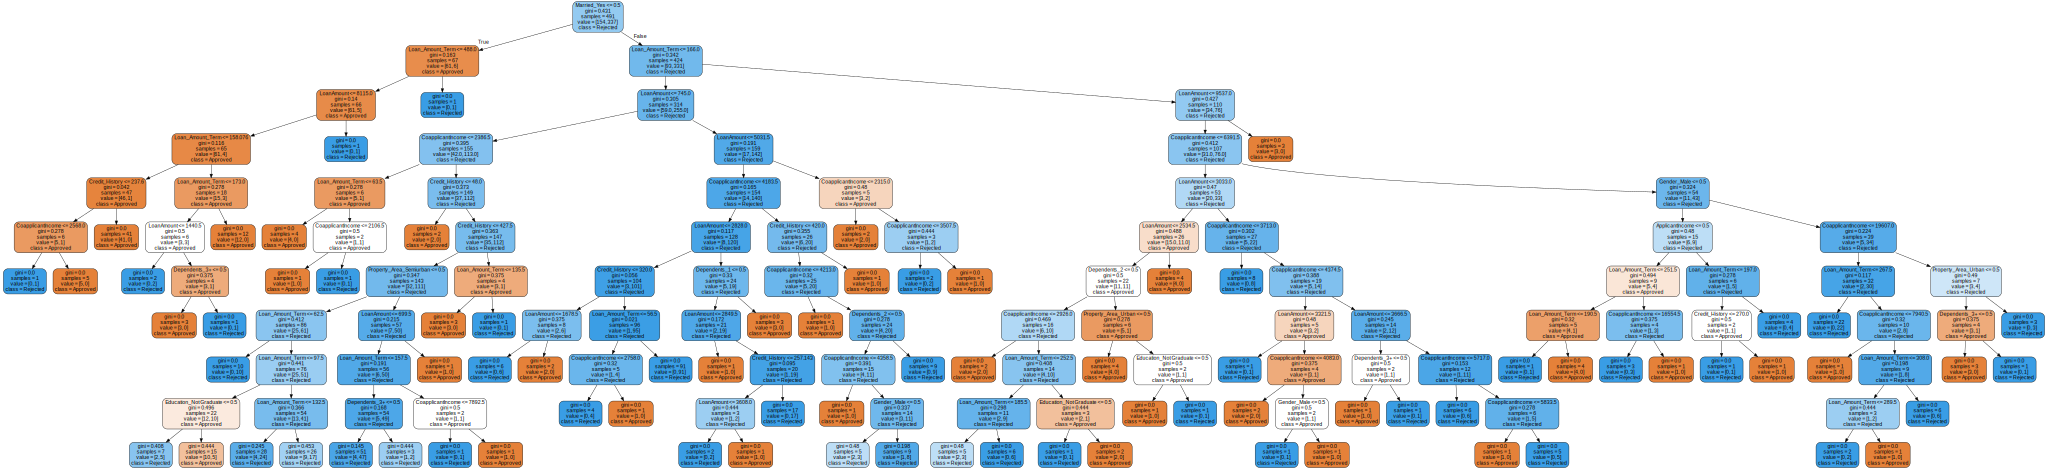

In [113]:
from graphviz import Source
Source.from_file('df_encoded')

In [114]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Decision Tree Accuracy: 0.78
Precision: 0.83
Recall: 0.86
F1-score: 0.84


In [115]:
tree_entropy = DecisionTreeClassifier(criterion='entropy',
                              max_depth=10,
                                      min_samples_split=2,
                              random_state=42)

# Fit the tree on your dataset
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [116]:
export_graphviz(tree_entropy,out_file ='df_encoded',feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],class_names = ['Approved','Rejected'], rounded = True,filled = True ,)

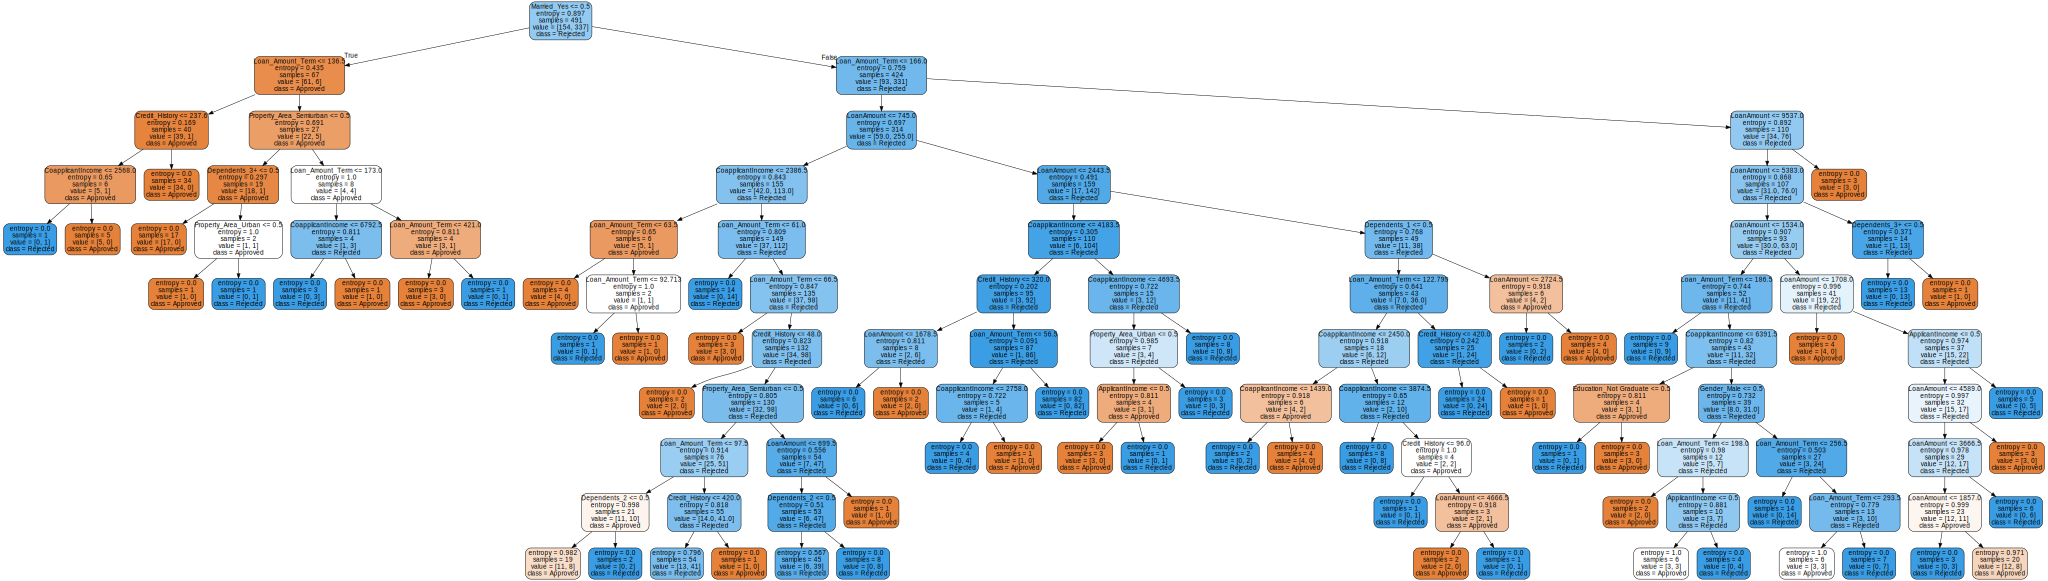

In [117]:
from graphviz import Source
Source.from_file('df_encoded')

In [118]:
y_pred_entropy = tree_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Decision Tree Accuracy: {accuracy_entropy:.2f}")
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)

# Print the results
print(f'Precision: {precision_entropy:.2f}')
print(f'Recall: {recall_entropy:.2f}')
print(f'F1-score: {f1_entropy:.2f}')

Decision Tree Accuracy: 0.70
Precision: 0.82
Recall: 0.73
F1-score: 0.77


The metrics for the decision tree with gini criterion and a maximum depth of 10 initially are as follows:

Accuracy=0.78

Precision=0.83

Recall=0.86

F1 score=0.84


The metrics for the decision tree with entropy criterion and a maximum depth of 10 initially are as follows:

Accuracy=0.70

Precision=0.82

Recall=0.73

F1 score=0.77




We will be performing pre-pruning to improve the performance of the decision tree classifier.

In [119]:
tree_gini_pre = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,random_state=42)
tree_gini_pre.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [120]:
export_graphviz(tree_gini_pre,out_file ='df_encoded',feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],class_names = ['Approved','Rejected'], rounded = True,filled = True ,)

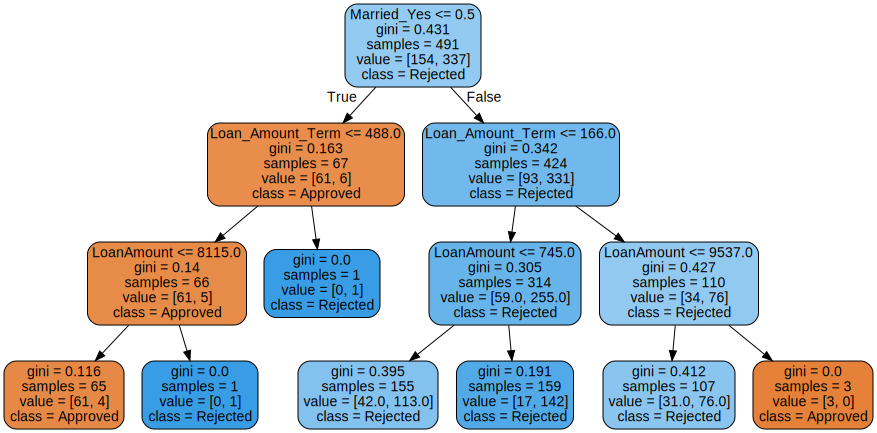

In [121]:
from graphviz import Source
Source.from_file('df_encoded')

In [122]:
from sklearn.metrics import accuracy_score
y_pred_pre = tree_gini_pre.predict(X_test)
accuracy_pre = accuracy_score(y_test, y_pred_pre)
print(f"Decision Tree Accuracy: {accuracy_pre:.2f}")
precision_pre = precision_score(y_test, y_pred_pre)
recall_pre = recall_score(y_test, y_pred_pre)
f1_pre = f1_score(y_test, y_pred_pre)

# Print the results
print(f'Precision: {precision_pre:.2f}')
print(f'Recall: {recall_pre:.2f}')
print(f'F1-score: {f1_pre:.2f}')

Decision Tree Accuracy: 0.85
Precision: 0.82
Recall: 0.99
F1-score: 0.90


In [123]:
tree_entropy_pre = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                                      min_samples_split=2,
                              random_state=42)

# Fit the tree on your dataset
tree_entropy_pre.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [124]:
export_graphviz(tree_entropy_pre,out_file ='df_encoded',feature_names=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married_Yes', 'Gender_Male', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],class_names = ['Approved','Rejected'], rounded = True,filled = True ,)

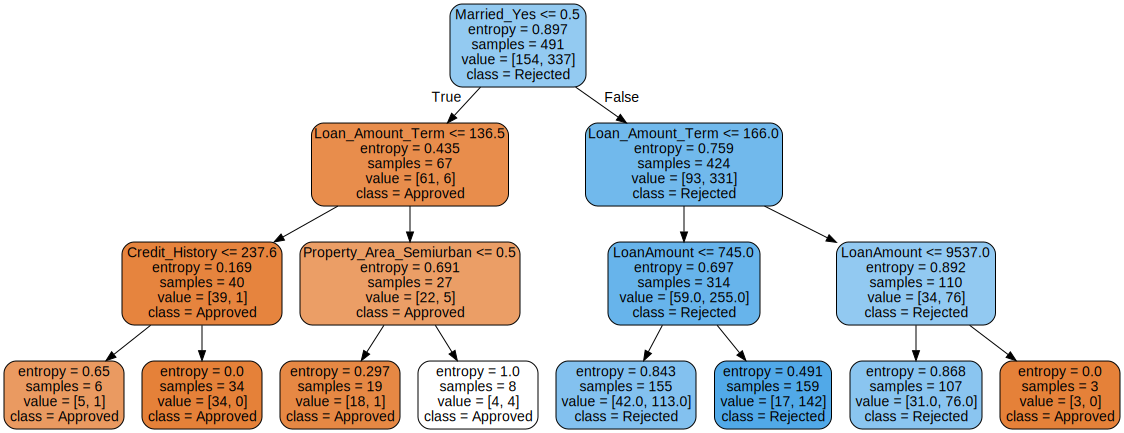

In [125]:
from graphviz import Source
Source.from_file('df_encoded')

In [126]:
y_pred_entropy_pre = tree_entropy_pre.predict(X_test)
accuracy_entropy_pre = accuracy_score(y_test, y_pred_entropy_pre)
print(f"Decision Tree Accuracy: {accuracy_entropy_pre:.2f}")
precision_entropy_pre = precision_score(y_test, y_pred_entropy_pre)
recall_entropy_pre = recall_score(y_test, y_pred_entropy_pre)
f1_entropy_pre = f1_score(y_test, y_pred_entropy_pre)

# Print the results
print(f'Precision: {precision_entropy_pre:.2f}')
print(f'Recall: {recall_entropy_pre:.2f}')
print(f'F1-score: {f1_entropy_pre:.2f}')

Decision Tree Accuracy: 0.85
Precision: 0.83
Recall: 0.99
F1-score: 0.90


After pre-pruning the scores have improved.


The new model with gini criterion has a maximum depth of 3 after pre-pruning. It's performance metrics are as follows:

Accuracy=0.85

Precision=0.82

Recall=0.99

F1 score=0.90


The new model with entropy as criterion has a maximum depth of 3 after pre-pruning. It's performance metrics are as follows:

Accuracy=0.85

Precision=0.83

Recall=0.99

F1 score=0.90



**Post Pruning**

0.007172711739412789
Recall: 0.9882
Precision: 0.8317


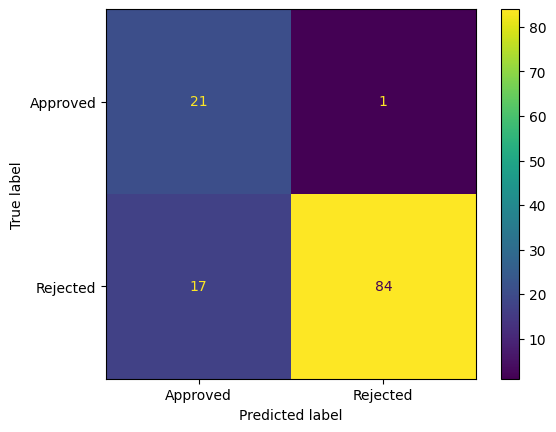

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score

# During the post pruning , in the first step, we consider the entire tree and then calculate the cost of each node,
# and calculate the alpha for each node . Find the sub tree with the smallest alpha (which signifies that it is the weakest link )and prune it
# this forms a new tree
# Repeat the above mentioned steps on this tree
# Continue the process till only one node is left
# Now store all the alpha values of the weakest links we found so far in a list (Here in the code named as path)

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Now we train the decision tree with various alpha values we stored in the list
# Storing multiple decision trees in a list

tree_pruned = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    tree_pruned.append(tree)

#Choose the final alpha value based on the accuracy scores on the test and train scores

train_scores = [tree.score(X_train, y_train) for tree in tree_pruned]
test_scores = [tree.score(X_test, y_test) for tree in tree_pruned]

# Finding the best alpha where test accuracy is maximized
best_alpha_index = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_alpha_index]
print(best_alpha)

# Now retrain the final tree with the best alpha value
tree_pruned_final = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
tree_pruned_final.fit(X_train, y_train)

y_test_pred = tree_pruned_final.predict(X_test)
y_train_pred = tree_pruned_final.predict(X_train)

# Plotting the confusion matrix
con_matrix = confusion_matrix(y_test_pred,y_test)
cd = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=['Approved', 'Rejected'])
cd.plot()

recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


**Random Forest**

In [128]:
# Define and train the Random Forest with Regularization
random_forest_clf = RandomForestClassifier(
    n_estimators=50,         # Reduce number of trees
    max_depth=10,            # Limit depth of trees
    min_samples_split=5,     # Require at least 5 samples to split
    min_samples_leaf=3,      # Require at least 3 samples per leaf
    max_features='log2',     # Reduce feature selection
    max_samples=0.8,         # Use only 80% of the data per tree
    random_state=42
)

random_forest_clf.fit(X_train, y_train)  # Train the model

# Predict on training data
y_train_pred = random_forest_clf.predict(X_train)

# Predict on test data
y_test_pred = random_forest_clf.predict(X_test)

# Calculate Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print Results
print("=" * 100)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("=" * 100)

Train Accuracy: 0.81
Test Accuracy: 0.85
Precision: 0.83
Recall: 0.98
F1-Score: 0.90


**Random Forest:** Choosing Best Model

In [129]:
# Define hyperparameter values to test
n_estimators_values = [50, 100, 150]
max_depth_values = [2,3,4,5,7,10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 3, 5]

# Store best model parameters
best_model = None
best_score = 0

# Iterate through different hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                # Define the model
                random_forest_clf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features='log2',
                    max_samples=0.8,
                    random_state=42
                )

                # Train the model
                random_forest_clf.fit(X_train, y_train)

                # Predict on test data
                y_test_pred = random_forest_clf.predict(X_test)

                # Calculate metrics
                test_accuracy = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred)
                recall = recall_score(y_test, y_test_pred)
                f1 = f1_score(y_test, y_test_pred)

                # Print results
                print("=" * 100)
                print(f"n_estimators={n_estimators}, max_depth={max_depth}, "
                      f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
                print(f"Test Accuracy: {test_accuracy:.2f}")
                print(f"Precision: {precision:.2f}")
                print(f"Recall: {recall:.2f}")
                print(f"F1-Score: {f1:.2f}")
                print("=" * 100)

                # Track best model (based on highest F1-score)
                if f1 > best_score:
                    best_score = f1
                    best_model = (n_estimators, max_depth, min_samples_split, min_samples_leaf)

# Print the best model parameters
print("\n Best Model Found:")
print(f"n_estimators={best_model[0]}, max_depth={best_model[1]}, "
      f"min_samples_split={best_model[2]}, min_samples_leaf={best_model[3]}")
print(f"Best F1-Score: {best_score:.2f}")

n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=1
Test Accuracy: 0.82
Precision: 0.80
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=3
Test Accuracy: 0.82
Precision: 0.80
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=5
Test Accuracy: 0.81
Precision: 0.79
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=1
Test Accuracy: 0.82
Precision: 0.80
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=3
Test Accuracy: 0.82
Precision: 0.80
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=5
Test Accuracy: 0.81
Precision: 0.79
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=10, min_samples_leaf=1
Test Accuracy: 0.82
Precision: 0.80
Recall: 0.99
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=10, min_sampl

**Best Model**: Finding Best Model

Model Parameter:

*   n_estimators=50
*   max_depth=3
*   min_samples_split=2
*   min_samples_leaf=1

Model Performance:

*   Test Accuracy: 0.85
*   Precision: 0.83
*   Recall: 0.99
*   F1-Score: 0.90



**Using Class Weight**

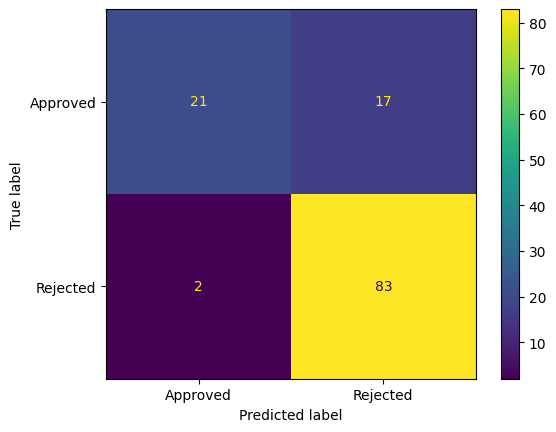

In [130]:
# Plotting the confusion matrix
con_matrix = confusion_matrix(y_test, y_test_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=['Approved', 'Rejected'])
cd.plot()
plt.show()

In [131]:
# Define hyperparameter values to test
n_estimators_values = [50, 100, 150]
max_depth_values = [2,3,4,5,7,10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 3, 5]

# Store best model parameters
best_model = None
best_score = 0

# Iterate through different hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                # Define the model
                random_forest_clf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    max_features='log2',
                    max_samples=0.8,
                    class_weight='balanced',  # Balance class distributions
                    random_state=42
                )

                # Train the model
                random_forest_clf.fit(X_train, y_train)

                # Predict on test data
                y_test_pred = random_forest_clf.predict(X_test)

                # Calculate metrics
                test_accuracy = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred)
                recall = recall_score(y_test, y_test_pred)
                f1 = f1_score(y_test, y_test_pred)

                # Print results
                print("=" * 100)
                print(f"n_estimators={n_estimators}, max_depth={max_depth}, "
                      f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
                print(f"Test Accuracy: {test_accuracy:.2f}")
                print(f"Precision: {precision:.2f}")
                print(f"Recall: {recall:.2f}")
                print(f"F1-Score: {f1:.2f}")
                print("=" * 100)

                # Track best model (based on highest F1-score)
                if f1 > best_score:
                    best_score = f1
                    best_model = (n_estimators, max_depth, min_samples_split, min_samples_leaf)

# Print the best model parameters
print("\n Best Model Found:")
print(f"n_estimators={best_model[0]}, max_depth={best_model[1]}, "
      f"min_samples_split={best_model[2]}, min_samples_leaf={best_model[3]}")
print(f"Best F1-Score: {best_score:.2f}")

n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=1
Test Accuracy: 0.85
Precision: 0.84
Recall: 0.96
F1-Score: 0.90
n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=3
Test Accuracy: 0.84
Precision: 0.84
Recall: 0.95
F1-Score: 0.89
n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=5
Test Accuracy: 0.83
Precision: 0.83
Recall: 0.94
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=1
Test Accuracy: 0.85
Precision: 0.84
Recall: 0.96
F1-Score: 0.90
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=3
Test Accuracy: 0.84
Precision: 0.84
Recall: 0.95
F1-Score: 0.89
n_estimators=50, max_depth=2, min_samples_split=5, min_samples_leaf=5
Test Accuracy: 0.83
Precision: 0.83
Recall: 0.94
F1-Score: 0.88
n_estimators=50, max_depth=2, min_samples_split=10, min_samples_leaf=1
Test Accuracy: 0.85
Precision: 0.84
Recall: 0.96
F1-Score: 0.90
n_estimators=50, max_depth=2, min_samples_split=10, min_sampl

**Best Model**: Use Class Weights (Since Imbalanced Data)

Model Parameter:

*   n_estimators=150
*   max_depth=2
*   min_samples_split=2
*   min_samples_leaf=1

Model Performance:

*   Test Accuracy: 0.85
*   Precision: 0.84
*   Recall: 0.98
*   F1-Score: 0.90








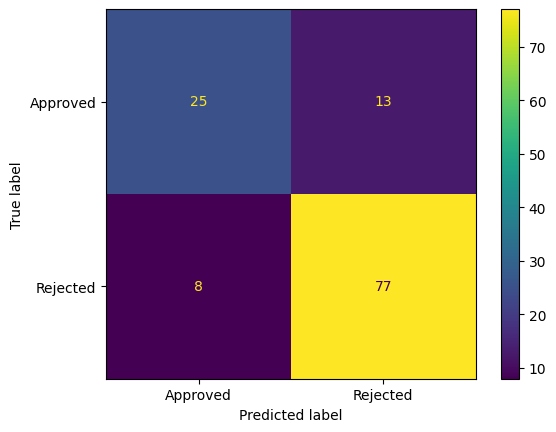

In [132]:

# Plotting the confusion matrix
con_matrix = confusion_matrix(y_test, y_test_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=['Approved', 'Rejected'])
cd.plot()
plt.show()
